In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

from scipy.signal import find_peaks

import matplotlib
from pylab import rcParams
#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})
from matplotlib.ticker import FormatStrFormatter

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, error_bad_lines=False, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

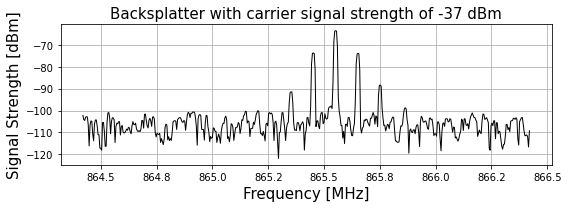

In [2]:
path = './TDO_SinvsSquare/100k_sin_tx_g30/'
filename = 'data0'
df_1 = readfile(path + filename + ".csv")

rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)

ax1.plot(df_1['frequency']/1e6, df_1['power'], color='black', linewidth=1)
ax1.set_xlabel('Frequency [MHz]', fontsize=15)
ax1.set_ylabel('Signal Strength [dBm]', fontsize=15)

ax1.grid()
ax1.set_title('Backsplatter with carrier signal strength of -37 dBm', fontsize=15)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.savefig('backsplatter_g30.pdf')

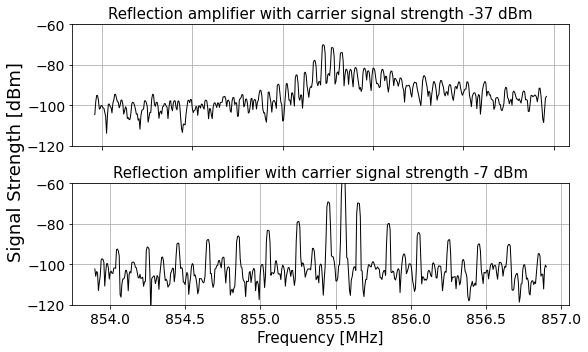

In [3]:
path = './ReflectedAmplifier/100k_RA_tx_g30/'
filename = 'data0'
df_1 = readfile(path + filename + ".csv")

path = './ReflectedAmplifier/RA_60/'
filename = 'data0'
df_2 = readfile(path + filename + ".csv")


# Visualization
# Plot
from pylab import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['figure.figsize'] = 8, 5
fig, (ax1,ax2) = plt.subplots(2,1)

ax1.plot(df_1['frequency']/1e6, df_1['power'], color='black', linewidth=1)
ax1.set_title('Reflection amplifier with carrier signal strength -37 dBm', fontsize=15)
ax1.tick_params(labelbottom=False, labelsize=14)
ax1.set_ylim([-120, -60])
ax1.grid()

ax2.plot(df_2['frequency']/1e6, df_2['power'], color='black', linewidth=1)
ax2.tick_params(labelsize=14)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_ylim([-120, -60])
ax2.set_title('Reflection amplifier with carrier signal strength -7 dBm', fontsize=15)
ax2.set_xlabel('Frequency [MHz]', fontsize=15)
ax2.grid()

fig.text(0.0, 0.54, 'Signal Strength [dBm]', va='center', ha='center', rotation='vertical', fontsize=18)
plt.tight_layout()
plt.savefig('./ra_g30vsg60.pdf', bbox_inches = "tight")